### 1. 데이터가 저장된 폴더를 연결

In [1]:
!mkdir -p aiffel/time_series_basic
#!ln -s data/* aiffel/time_series_basic
!cp ../../data/AirPassengers.csv aiffel/time_series_basic/

#### 1) 주피터 노트북에서는 파일이 실행된 현재 위치에서 시작하기 때문에 __../__을 이용해서 원래 자리로 돌아가줘야 한다.

#### 2) 현재 위치는 ls를 이용해서 확인

In [2]:
!ls

 aiffel  '[F-44]시계열 분류.ipynb'


### 2. tfresh 설치

In [3]:
# !pip install tsfresh

#### 1) WARNING:
- 출처: https://bobbyhadz.com/blog/python-warning-running-pip-as-the-root-user-can-result-in-broken-permissions
- 위 출처를 보고 warning 문구를 없애려 해봤지만 실패했다.

In [4]:
# 라이브러리 버전 충돌을 피하기 위해 런타임을 재시작합니다.
# import os
# os.kill(os.getpid(), 9)

#### 2) 위 코드를 실행하면 커널이 죽는다.

### 3. 라이브러리 불러오기

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### 1) air passengers 데이터 불러오기

In [6]:
ap = pd.read_csv('/aiffel/aiffel/time_series_basic/AirPassengers.csv')

ap.drop('Month', axis = 1, inplace = True)

In [7]:
ap

,#Passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


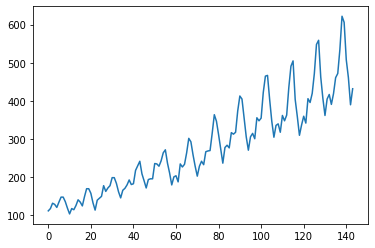

In [8]:
plt.figure()
plt.plot(ap)
plt.show()

- #### 분산도 점점 커지고 추세도 계속 증가하는 것을 확인할 수 있다

### 4. 정상 데이터로 변경

#### 1) np.log를 통해서 log transformation

In [9]:
log_transformed = np.log(ap)

In [10]:
log_transformed

,#Passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791
...,...
139,6.406880
140,6.230481
141,6.133398
142,5.966147


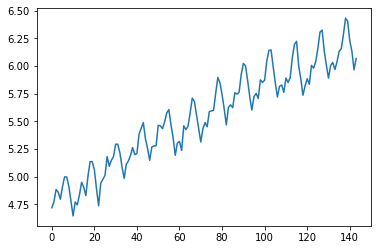

In [11]:
plt.figure()
plt.plot(log_transformed)
plt.show()

- #### 분산이 일정해진 것을 눈으로 확인할 수 있음

#### 2) diff() 함수를 통해 간단하게 차분을 수행할 수 있음

In [12]:
diffed = log_transformed.diff()[1:]

In [13]:
diffed

,#Passengers
1,0.052186
2,0.112117
3,-0.022990
4,-0.064022
5,0.109484
...,...
139,-0.026060
140,-0.176399
141,-0.097083
142,-0.167251


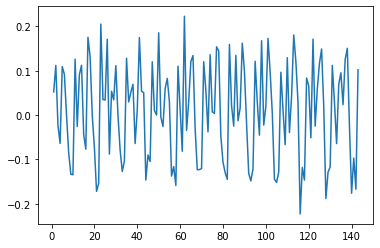

In [14]:
plt.figure()
plt.plot(diffed)
plt.show()

- #### 커지는 분산과 증가하는 추세를 제거한 air passengers 데이터를 얻을 수 있다

#### 3) diff에 12라는 값을 넣어주면 주기를 12로 하는 계절 차분을 수행할 수 있음

In [15]:
seasonally_diffed = diffed.diff(12)

In [16]:
seasonally_diffed

,#Passengers
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
...,...
139,-0.045934
140,0.012024
141,0.031830
142,-0.050082


- #### 차분을 하면 데이터가 짧아지기때문에 빈칸을 제거해야함

In [17]:
seasonally_diffed.dropna(inplace = True)

In [18]:
seasonally_diffed

,#Passengers
13,0.039164
14,0.000361
15,-0.020496
16,-0.012939
17,0.066148
...,...
139,-0.045934
140,0.012024
141,0.031830
142,-0.050082


- #### 데이터는 dropna를 적용한 후의 데이터에는 NaN이 없다.

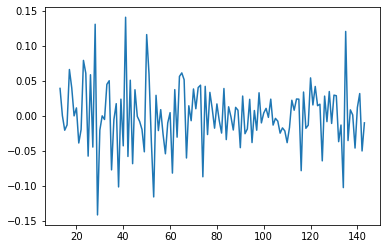

In [19]:
plt.figure()
plt.plot(seasonally_diffed)
plt.show()

### 5. 정상성 검정

In [20]:
from statsmodels.tsa.stattools import adfuller

#### 1) adfuller에는 output이 6개나 되기 때문에 **stat**과 **p_value**만 나오도록 adf검정을 위한 함수를 직접 정의

In [21]:
def adf_test(x):
    stat, p_value, lags, nobs, crit, icb = adfuller(x)
    print('ADF statistics')
    print(stat) # ADF 검정 통계량입니다
    print('P-value')
    print(p_value) # P-value입니다

#### 2) 계절차분까지 수행한 데이터에 대해 adf테스트를 수행

In [22]:
adf_test(seasonally_diffed)

ADF statistics
-4.443324941831123
P-value
0.0002485912311384052


- #### P-value가 0.01보다 작으므로 유의수준 0.01에서 단위근이 존재한다는 귀무가설을 기각하고 시계열은 정상적이라는 대립가설을 채택할 수 있다.

### 6. 시계열 분석

#### 1) 데이터 다운로드 및 불러오기

In [23]:
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, load_robot_execution_failures

download_robot_execution_failures()
timeseries, y = load_robot_execution_failures()

#### 2) 데이터셋 확인(timeseries와 y 확인)

In [24]:
timeseries.head(30)

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
0,1,0,-1,-1,63,-3,-1,0
1,1,1,0,0,62,-3,-1,0
2,1,2,-1,-1,61,-3,0,0
3,1,3,-1,-1,63,-2,-1,0
4,1,4,-1,-1,63,-3,-1,0
5,1,5,-1,-1,63,-3,-1,0
6,1,6,-1,-1,63,-3,0,0
7,1,7,-1,-1,63,-3,-1,0
8,1,8,-1,-1,63,-3,-1,0
9,1,9,-1,-1,61,-3,0,0


- #### id, time을 제외하고 6개 column의 X변수가 나타남

In [25]:
y

1      True
2      True
3      True
4      True
5      True
      ...  
84    False
85    False
86    False
87    False
88    False
Length: 88, dtype: bool

- #### true/false가 제시되어 있음

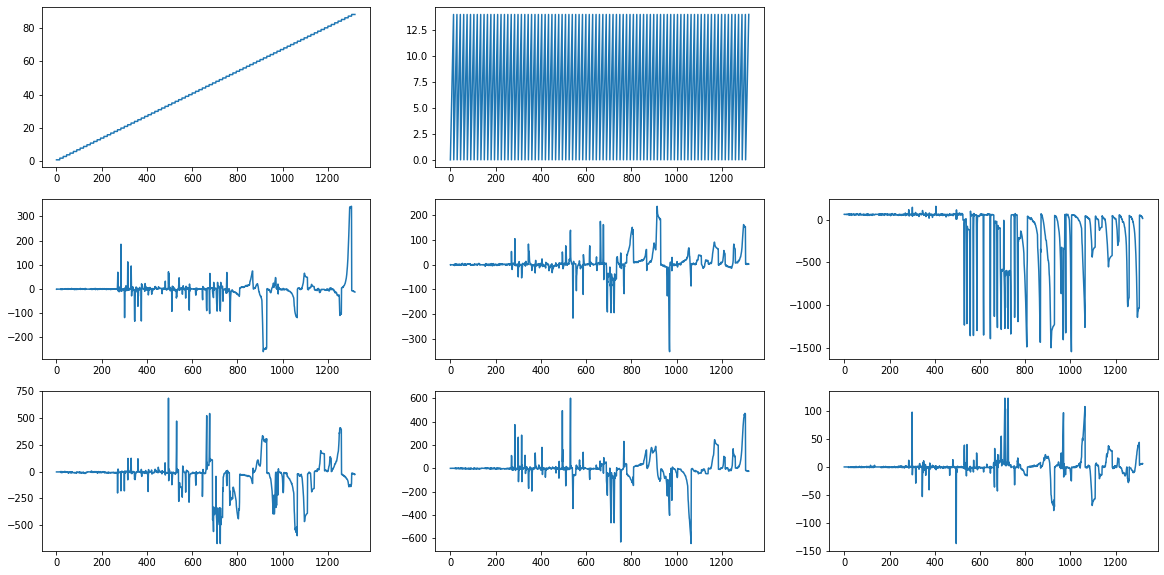

In [26]:
plt.figure(figsize=(20, 10))

plt.subplot(3,3,1)
plt.plot(timeseries['id'])

plt.subplot(3,3,2)
plt.plot(timeseries['time'])

plt.subplot(3,3,4)
plt.plot(timeseries['F_x'])

plt.subplot(3,3,5)
plt.plot(timeseries['F_y'])

plt.subplot(3,3,6)
plt.plot(timeseries['F_z'])

plt.subplot(3,3,7)
plt.plot(timeseries['T_x'])

plt.subplot(3,3,8)
plt.plot(timeseries['T_y'])

plt.subplot(3,3,9)
plt.plot(timeseries['T_z'])

plt.show()

#### 3) 데이터셋 가공

#### 1) np.log를 통해서 log transformation

In [27]:
log_transformed = np.log1p(abs(timeseries))

In [28]:
log_transformed

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
0,0.693147,0.000000,0.693147,0.693147,4.158883,1.386294,0.693147,0.000000
1,0.693147,0.693147,0.000000,0.000000,4.143135,1.386294,0.693147,0.000000
2,0.693147,1.098612,0.693147,0.693147,4.127134,1.386294,0.000000,0.000000
3,0.693147,1.386294,0.693147,0.693147,4.158883,1.098612,0.693147,0.000000
4,0.693147,1.609438,0.693147,0.693147,4.158883,1.386294,0.693147,0.000000
...,...,...,...,...,...,...,...,...
1315,4.488636,2.397895,2.397895,1.098612,3.688879,3.091042,3.218876,1.791759
1316,4.488636,2.484907,2.484907,1.098612,3.663562,3.218876,3.135494,1.945910
1317,4.488636,2.564949,2.564949,1.386294,3.178054,3.218876,3.218876,1.791759
1318,4.488636,2.639057,2.639057,1.609438,3.295837,3.401197,3.332205,1.791759


In [29]:
def custom_classification_split(x,y,test_size=0.3):
    
    num_true = int(y.sum()*test_size)
    num_false = int((len(y)-y.sum())*test_size)
    
    id_list = y[y==False].head(num_false).index.to_list() + y[y==True].head(num_true).index.to_list()
    
    y_train = y.drop(id_list)
    y_test = y.iloc[id_list].sort_index()
    X_train = timeseries[~timeseries['id'].isin(id_list)]
    X_test = timeseries[timeseries['id'].isin(id_list)]
    
    return X_train, y_train, X_test, y_test

#### 4) 데이터셋 나누기

In [30]:
X_train, y_train, X_test, y_test = custom_classification_split(log_transformed, y, test_size = 0.25)

In [31]:
from tsfresh import extract_features
from tsfresh.feature_extraction import EfficientFCParameters
from tsfresh.utilities.dataframe_functions import impute

settings = EfficientFCParameters()

#### 5) Feature extraction

In [32]:
comprehensive_features_train = extract_features(
                                    X_train, 
                                    column_id="id",
                                    column_sort="time",
                                    default_fc_parameters=settings
                                          )

Feature Extraction: 100%|██████████| 402/402 [00:16<00:00, 24.27it/s]


In [33]:
comprehensive_features_test = extract_features(
                                    X_test, 
                                    column_id="id",
                                    column_sort="time",
                                    default_fc_parameters=settings
                                          )

Feature Extraction: 100%|██████████| 126/126 [00:04<00:00, 25.45it/s]


#### 6) impute (결측치 제거)

In [34]:
impute(comprehensive_features_train)

/opt/conda/lib/python3.9/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['F_x__partial_autocorrelation__lag_7'
 'F_x__partial_autocorrelation__lag_8'
 'F_x__partial_autocorrelation__lag_9' ...
 'T_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"mean"'
 'T_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"var"'
 'T_z__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(


,F_x__variance_larger_than_standard_deviation,F_x__has_duplicate_max,F_x__has_duplicate_min,F_x__has_duplicate,F_x__sum_values,F_x__abs_energy,F_x__mean_abs_change,F_x__mean_change,F_x__mean_second_derivative_central,F_x__median,...,T_z__fourier_entropy__bins_5,T_z__fourier_entropy__bins_10,T_z__fourier_entropy__bins_100,T_z__permutation_entropy__dimension_3__tau_1,T_z__permutation_entropy__dimension_4__tau_1,T_z__permutation_entropy__dimension_5__tau_1,T_z__permutation_entropy__dimension_6__tau_1,T_z__permutation_entropy__dimension_7__tau_1,T_z__query_similarity_count__query_None__threshold_0.0,T_z__mean_n_absolute_max__number_of_maxima_7
6,1.0,1.0,1.0,1.0,-15.0,39.0,1.714286,0.142857,0.153846,-1.0,...,0.974315,1.213008,1.732868,1.438883,1.863680,2.145842,2.163956,2.197225,0.0,0.714286
7,0.0,1.0,0.0,1.0,-13.0,21.0,0.928571,0.214286,-0.076923,-1.0,...,1.255482,1.494175,2.079442,1.043794,1.349792,1.666333,1.748067,1.831020,0.0,0.428571
8,1.0,0.0,1.0,1.0,-10.0,26.0,1.142857,-0.142857,0.192308,-1.0,...,1.494175,1.732868,2.079442,1.412745,2.138333,2.397895,2.302585,2.197225,0.0,1.285714
9,1.0,0.0,0.0,1.0,-10.0,24.0,1.428571,0.000000,-0.076923,-1.0,...,1.255482,1.494175,2.079442,1.479133,2.138333,2.397895,2.302585,2.197225,0.0,1.285714
10,0.0,0.0,1.0,1.0,-14.0,14.0,0.142857,0.000000,0.000000,-1.0,...,0.937285,1.213008,1.906155,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1.0,1.0,0.0,1.0,-1073.0,96833.0,7.142857,-5.428571,-0.038462,-98.0,...,0.735622,0.735622,1.386294,1.585771,2.253858,2.397895,2.302585,2.197225,0.0,24.285714
85,1.0,0.0,1.0,1.0,143.0,1683.0,1.357143,1.071429,0.076923,8.0,...,0.735622,0.735622,1.667462,1.332245,1.589027,1.893788,2.163956,2.197225,0.0,5.571429
86,1.0,0.0,0.0,0.0,961.0,83497.0,9.071429,9.071429,0.807692,52.0,...,0.735622,1.073543,1.732868,0.687092,0.983088,1.159589,1.227529,1.303092,0.0,9.285714
87,1.0,1.0,0.0,1.0,4509.0,1405437.0,12.928571,12.214286,-1.038462,338.0,...,0.735622,0.735622,1.386294,0.535961,0.836988,1.159589,1.497866,1.581094,0.0,40.285714


In [35]:
impute(comprehensive_features_test)

/opt/conda/lib/python3.9/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['F_x__partial_autocorrelation__lag_7'
 'F_x__partial_autocorrelation__lag_8'
 'F_x__partial_autocorrelation__lag_9' ...
 'T_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"mean"'
 'T_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"var"'
 'T_z__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(


,F_x__variance_larger_than_standard_deviation,F_x__has_duplicate_max,F_x__has_duplicate_min,F_x__has_duplicate,F_x__sum_values,F_x__abs_energy,F_x__mean_abs_change,F_x__mean_change,F_x__mean_second_derivative_central,F_x__median,...,T_z__fourier_entropy__bins_5,T_z__fourier_entropy__bins_10,T_z__fourier_entropy__bins_100,T_z__permutation_entropy__dimension_3__tau_1,T_z__permutation_entropy__dimension_4__tau_1,T_z__permutation_entropy__dimension_5__tau_1,T_z__permutation_entropy__dimension_6__tau_1,T_z__permutation_entropy__dimension_7__tau_1,T_z__query_similarity_count__query_None__threshold_0.0,T_z__mean_n_absolute_max__number_of_maxima_7
1,0.0,0.0,1.0,1.0,-14.0,14.0,0.142857,0.000000,-0.038462,-1.0,...,1.073543,1.440235,2.079442,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.0,0.000000
2,0.0,1.0,1.0,1.0,-13.0,25.0,1.000000,0.000000,-0.038462,-1.0,...,1.073543,1.494175,2.079442,0.937156,1.234268,1.540306,1.748067,1.831020,0.0,0.571429
3,0.0,0.0,1.0,1.0,-10.0,12.0,0.714286,0.000000,-0.038462,-1.0,...,1.386294,1.732868,2.079442,1.265857,1.704551,2.019815,2.163956,2.197225,0.0,0.571429
4,0.0,1.0,1.0,1.0,-6.0,16.0,1.214286,-0.071429,-0.038462,0.0,...,1.073543,1.494175,2.079442,1.156988,1.907284,2.397895,2.302585,2.197225,0.0,1.000000
5,0.0,0.0,0.0,1.0,-9.0,17.0,0.928571,-0.071429,0.038462,-1.0,...,0.900256,1.320888,2.079442,1.156988,1.863680,2.271869,2.302585,2.197225,0.0,0.857143
19,1.0,0.0,0.0,1.0,99.0,6109.0,13.928571,-1.928571,-1.730769,1.0,...,0.974315,1.494175,1.906155,1.230932,1.704551,2.019815,2.025326,2.043192,0.0,1.428571
20,1.0,0.0,1.0,1.0,155.0,34455.0,16.714286,-13.142857,7.576923,-1.0,...,1.386294,1.667462,2.079442,1.564957,2.022809,2.271869,2.302585,2.197225,0.0,2.571429
21,1.0,0.0,0.0,1.0,-171.0,16495.0,20.928571,1.785714,3.961538,-1.0,...,0.735622,0.735622,0.735622,1.303876,1.791759,2.271869,2.302585,2.197225,0.0,17.285714
22,1.0,0.0,0.0,1.0,102.0,12700.0,10.785714,-8.071429,4.500000,-1.0,...,0.562335,0.735622,1.732868,1.524707,2.138333,2.397895,2.302585,2.197225,0.0,5.428571
23,1.0,0.0,0.0,1.0,67.0,10593.0,15.142857,-7.000000,3.000000,-3.0,...,0.974315,1.255482,2.079442,1.519383,2.369382,2.397895,2.302585,2.197225,0.0,3.714286


/tmp/ipykernel_85/2145861369.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
/tmp/ipykernel_85/2145861369.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


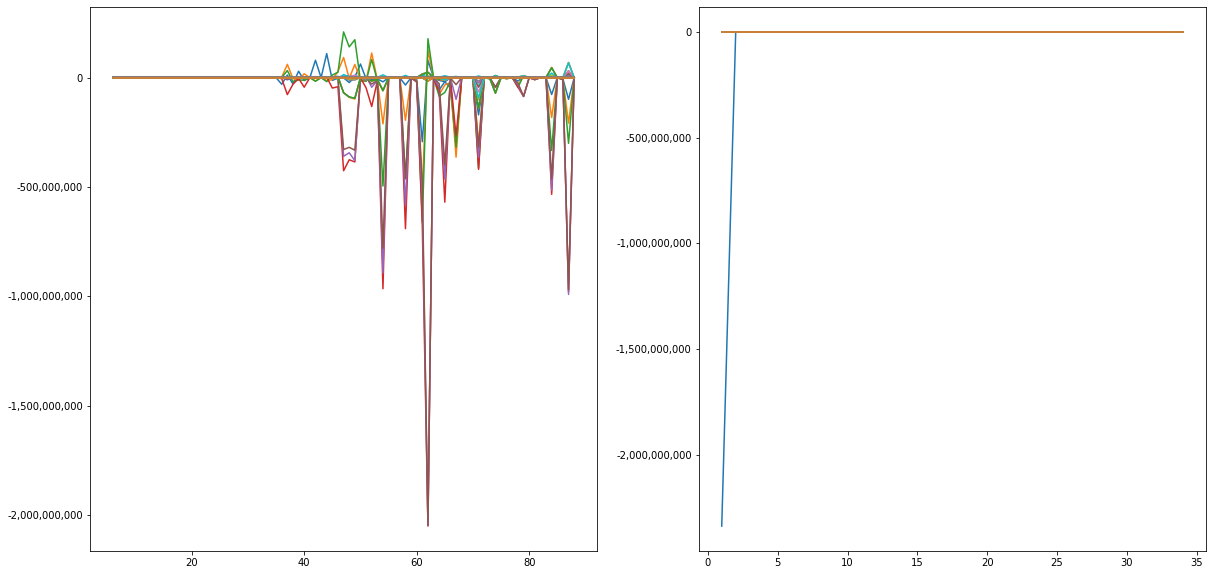

In [36]:
plt.figure(figsize=(20, 10))

plt.subplot(1,2,1)
plt.plot(comprehensive_features_train)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.subplot(1,2,2)
plt.plot(comprehensive_features_test)
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.show()

- 출처: https://zephyrus1111.tistory.com/178

#### 7-1) Logistic Regression 사용 및 score 확인

In [37]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()

lr_clf.fit(comprehensive_features_train, y_train)

LogisticRegression()

In [38]:
lr_clf.score(comprehensive_features_test, y_test)

0.5714285714285714

- #### test셋에 적합해본 결과 0.5정도의 불만족스러운 결과를 확인할 수 있었다.

#### 7-2) RandomForest 사용 및 score 확인

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 10, max_depth = 3)

rf_clf.fit(comprehensive_features_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [40]:
rf_clf.score(comprehensive_features_test, y_test)

1.0

- #### test셋에 적합해본 결과 매번 다른 결과가 나오며, 0.6에서 1.0까지 다양한 결과를 확인할 수 있었다.

#### 7-3) XGBoost 사용 및 score 확인

In [41]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(n_estimators = 10, max_depth = 3)

xgb_clf.fit(comprehensive_features_train, y_train)

/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:42:28] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
xgb_clf.score(comprehensive_features_test, y_test)

1.0

- #### test셋에 적합해본 결과 1의 정확도를 보이며 만족스러운 결과를 확인할 수 있습니다.

#### 8) XGBoost plot_importance 확인 및 시각화

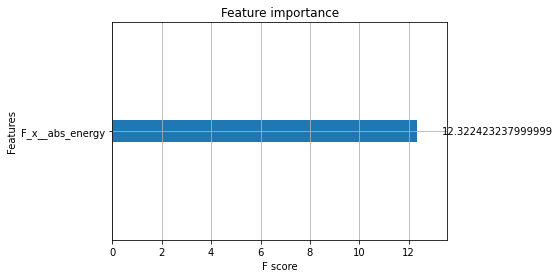

In [43]:
xgb.plot_importance(xgb_clf, importance_type = 'gain')
plt.show()

- #### plot_importance를 통해 어떤 변수(특징)가 가장 유의미한지 확인

In [44]:
sum(xgb_clf.feature_importances_ != 0)

1

- #### Fx값의 abs_energy특징만의 유의미함

#### 9) Classification report를 통한 검증 및 분석

In [45]:
from sklearn.metrics import classification_report

classification_report(y_test, xgb_clf.predict(comprehensive_features_test), target_names = ['true', 'false'], output_dict = True)

{'true': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 16},
 'false': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 5},
 'accuracy': 1.0,
 'macro avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 21},
 'weighted avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 21}}

In [46]:
adf_test(comprehensive_features_train['F_x__abs_energy'])

ADF statistics
-7.557876866997544
P-value
3.065073194618745e-11


In [47]:
print(format(3.065073194618745e-11, '.11f'))

0.00000000003


- #### Train 데이터의 F_x__abs_energy는 정상 시계열이다.

In [48]:
adf_test(comprehensive_features_test['F_x__abs_energy'])

ADF statistics
-2.1436614122462636
P-value
0.22732421734871383


- #### 유의 수준을 0.1이라고 생각해도 p-value가 너무 높다. 그러므로 귀무가설은 기각할 수 없고, Test 데이터의 F_x__abs_energy는 '비정상' 시계열이다.

### [p-value와 정상성의 관계]
단순한 분석에서 결과를 쉽게 파악하고자 한다면, p-value를 중심적으로 보면 됩니다.

p-value는 유의확률이라고도 불립니다. 귀무가설(null hypothesis)이 관찰된 데이터의 통계치(statistics)와 양립할 수 있는지를 0부터 1까지의 숫자로 나타냅니다. 0에 가까울수록 통계치가 귀무가설과의 양립하는 정도가 낮습니다. P-value를 통해 귀무가설을 기각(대립가설을 채택)하기 위해서, 우리는 기준을 둡니다. 이를 유의수준(significance level)이라고 부릅니다. 일반적으로 사용되는 값은 0.05나 0.01입니다. 유의수준은 (1- 신뢰도) 입니다. 그렇기에 유의수준으로 0.05를 이용했을 때의 신뢰도는 0.95 (95%)라고 할 수 있겠지요. 현재 진행중인 분석의 중요도나 엄밀함에 따라서 0.05보다 느슨한(높은) 값을 기준으로 둘 수도 있고 0.01보다도 까다로운(낮은) 값을 기준으로 둘 수 있습니다.

예를 들어서 이해해봅시다. 우리는 어떤 시계열이 정상적인지 알고 싶고, 약 95%의 신뢰도로 이를 검정해보고 싶습니다. 그래서 ADF 검정을 이용하였고 출력값에 p-value가 0.06이 나왔습니다. ADF 검정의 귀무가설은 ‘단위근이 존재한다’ 였습니다. 그리고 단위근이 존재하면 비정상 시계열입니다. 우리는 95%의 신뢰도를 바탕으로 0.05라는 유의수준을 두었는데 출력값의 p-value는 이보다 높게 나왔습니다. 이 경우 우리는 귀무가설을 기각할 수 없습니다. 즉 이 시계열이 정상 시계열이라고 결론 내릴 수 없습니다. 이런 방법으로 우리는 검정을 통해 정상 시계열임을 판단할 수 있습니다.


출처: https://modulabs.co.kr/blog/time-series-stationarity/

-----------

### 7. 회고

#### 7-1) 어려웠던 점 / 해결을 위해 시도한 방법 / 문제해결에 성공한 이유 또는 실패한 이유

- robot execution failures의 데이터 정보를 알아보기가 어려웠다. 어떻게 측정한 것인지, 애초에 robot execution failures가 뭔지 모르겠다. 검색을 해도 사람들이 이 데이터로 많이 시도를 안 해봐서 검색 결과가 별로 없다.
- robot execution failures를 adf 검정을 시켰을 때 처음에 그냥 데이터를 넣었더니 데이터프레임이라서 오류가 났다. 컬럼을 하나씩 꺼내서 넣으니까 검정이 가능했다.

#### 7-2) 프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점

- p-value는 시계열 데이터의 정상성을 파악하는 데 영향이 있다고 생각했는데 혼란스럽다.
- comprehensive_features_test['F_x__abs_energy']는 XGBoost가 분류하는데 가장 도움을 받은 feature인데, 막상 이 feature는 비정상 시계열이었다.
- 계절성, 정상성, 반복성: 모호하다!!!
- tsfresh를 설치하다보면 numpy랑 버전 충돌이 일어난다.

#### 7-3) 루브릭 평가 지표를 맞추기 위해 시도한 내용

- Air Passengers 데이터에서 했던 방식들을 robot execution failures에도 똑같이 적용해봤다.

#### 7-4) 자기 다짐 / 프로젝트를 진행하면서 느낀점

- 루브릭을 잘못 읽는 건지 나만 다른 사람들과 다른 분석을 하고 있는 것 같다. 이왕 하는 거 분석하면서 많이 배워야겠다.
- 블로그에 프로젝트를 진행하면서 겪었던 시행착오를 기록해두고 싶은데, 프로젝트를 하다가 막히는 걸 해결하는 순간에 다시 프로젝트로 돌아가버리니까 그 순간에 뭐가 막혔었는 지 잊어버리고 블로그에도 기록을 못하는 것 같다. 막히는 게 있을 때 마다 블로그를 먼저 키고 해결하는 순간 링크라도 블로그에 올려놔야겠다.